# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>


## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


# 1.1 Reading Data

In [113]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import re
from tqdm import tqdm

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

from collections import Counter
from prettytable import PrettyTable

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import datasets

from scipy.sparse import hstack

import pickle


In [2]:
project_data = pd.read_csv('c:\\train_data.csv')
resource_data = pd.read_csv('c:\\resources.csv')

In [3]:
print("Number of points in train data", project_data.shape)
print('_ '*35)
print("The attribute Names",project_data.columns.values)
#project_data.head(20)

Number of points in train data (109248, 17)
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
The attribute Names ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of points in resource data :", resource_data.shape)
print("attributes in resource data :", resource_data.columns.values)
resource_data.head(2)

Number of points in resource data : (1541272, 4)
attributes in resource data : ['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

Number of projects that are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects that are got rejected for funding  16542 , ( 15.141695957820739 %)


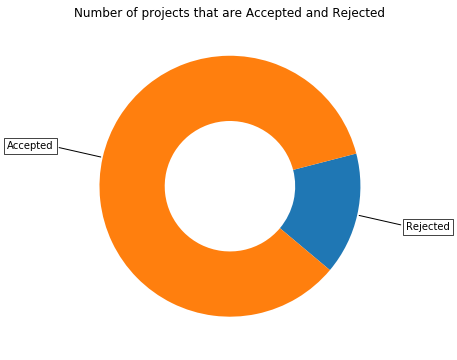

In [5]:
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects that are approved for funding ",y_value_counts[1],", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects that are got rejected for funding ",y_value_counts[0],", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

data = [y_value_counts[0],y_value_counts[1]]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))
recipe = ["Rejected","Accepted"]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props=dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)

kw = dict(xycoords="data",textcoords="data",arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i,p in enumerate(wedges):
    ang = (p.theta2-p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1:"left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle":connectionstyle})
    ax.annotate(recipe[i], xy=(x,y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment,**kw)

ax.set_title("Number of projects that are Accepted and Rejected")

plt.show()





### 1.2.1 Univariate Analysis: School State

In [6]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

'''# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')'''


'# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620\n\nscl = [[0.0, \'rgb(242,240,247)\'],[0.2, \'rgb(218,218,235)\'],[0.4, \'rgb(188,189,220)\'],            [0.6, \'rgb(158,154,200)\'],[0.8, \'rgb(117,107,177)\'],[1.0, \'rgb(84,39,143)\']]\n\ndata = [ dict(\n        type=\'choropleth\',\n        colorscale = scl,\n        autocolorscale = False,\n        locations = temp[\'state_code\'],\n        z = temp[\'num_proposals\'].astype(float),\n        locationmode = \'USA-states\',\n        text = temp[\'state_code\'],\n        marker = dict(line = dict (color = \'rgb(255,255,255)\',width = 2)),\n        colorbar = dict(title = "% of pro")\n    ) ]\n\nlayout = dict(\n        title = \'Project Proposals % of Acceptance Rate by US States\',\n        geo = dict(\n            scope=\'usa\',\n            projection=dict( type=\'albers usa\' ),\n            showlakes = True,\n            lakecolor = \'rgb(255, 255, 255)\',\n        ),\n    )\n\nfig = go.Figure(data=dat

In [7]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean).reset_index())
temp.columns = ['state_code', 'num_proposals']

temp.sort_values(by=["num_proposals"], inplace=True)
print(temp.head())
print("="*50)
print(temp.tail())


   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


## Summary

1. From the stats; ~10 % difference between highest proposal to the lowest i.e., Delware, DE has highest acceptal rate at ~89% to the lowest Velmort,VT at ~80%
2. It will explains that highest applications i.e., Velmort,VT with mean of 46 has less acceptance rate compared to lowest mean at 8 for Delware, DE

In [8]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2="project_is_approved", col3="total"):
    ind = np.arange(data.shape[0])
    
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind,data[col3].values)
    p2 = plt.bar(ind,data[col2].values)
    
    plt.ylabel('Projects')
    plt.title('Number of projects Approved vs Rejected')
    if len(list(data[xtick].values))>10:
        plt.xticks(ind,list(data[xtick].values),rotation=90)
    else:
        plt.xticks(ind,list(data[xtick].values))
            
    plt.legend((p1[0],p2[0]),('Total',"Accepted"))
    plt.show()

In [9]:
def univariate_barplots(data, col1, col2="project_is_approved", top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
    
    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True,ascending=False)
    
    if top:
        temp=temp[0:top]
    
    stack_plot(temp,xtick=col1, col2=col2, col3='total')
    print(temp.head())
    print("="*50)
    print(temp.tail())
    

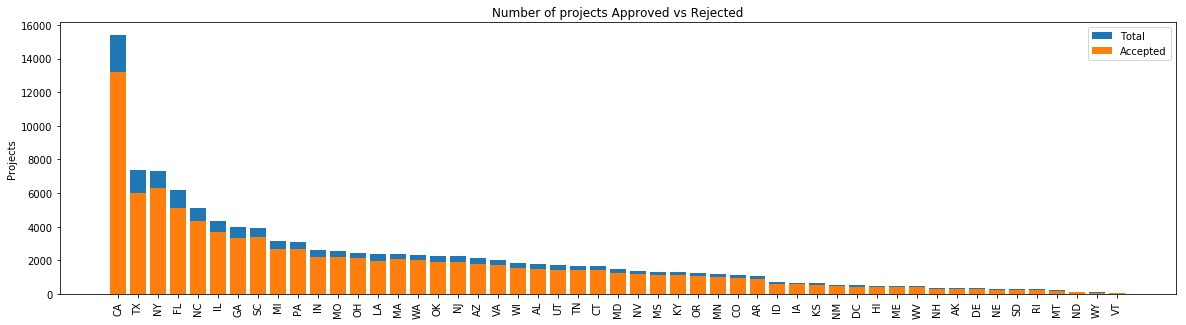

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [10]:
univariate_barplots(project_data,'school_state','project_is_approved',False)

#### SUMMARY: Every state has greater than 80% success rate in approval and stats shows only stats for top and bottom 5 states

### 1.2.2 Univariate Analysis: teacher_prefix

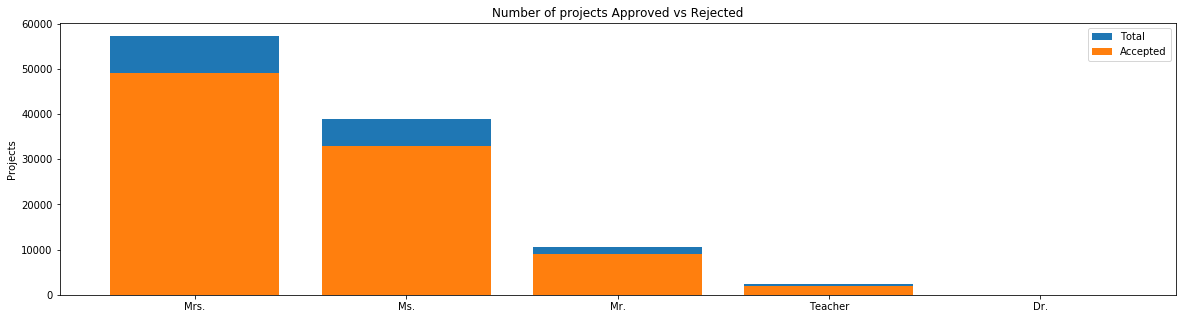

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [11]:
univariate_barplots(project_data,'teacher_prefix','project_is_approved',top=False)

### Summary
#1: From stats Mrs. were having high success rate of approval
#2: Results of both tail and head are identical because we have only 5 as it has only five categories

### 1.2.3 Univariate Analysis: project_grade_category

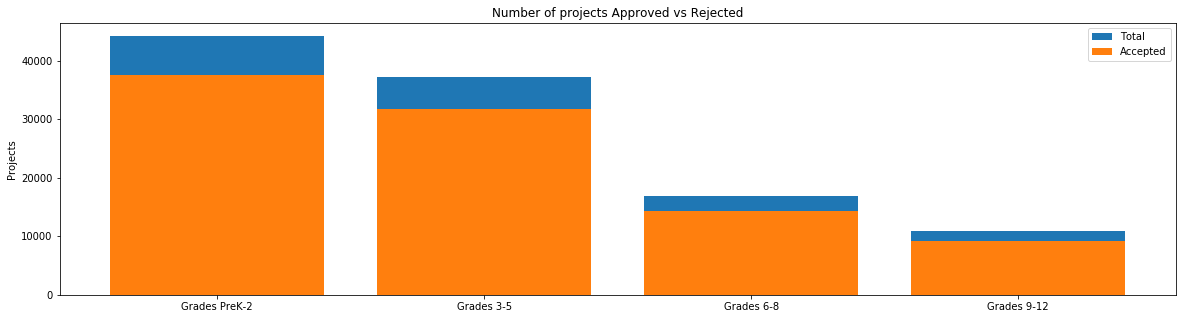

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [12]:
univariate_barplots(project_data,'project_grade_category','project_is_approved',top=False)

### Summary
#1: From stats Grades Pre k-2 were having high success rate of approval        compared to Grade 9-12. In other words, higher the applications higher the acceptance rate
#2: Results of both tail and head are identical because we have only 4 as it has only four categories

### 1.2.4 Univariate Analysis: project_subject_categories

In [13]:
categories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

cat_list =[]

for CategoryList in categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for currentCategory in CategoryList.split(','):# it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in currentCategory.split():# this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            currentCategory=currentCategory.replace('The','')# if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        currentCategory=currentCategory.replace(' ','')# we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=currentCategory.strip()+ " " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace("&","_") # we are replacing the & value into 
    cat_list.append(temp.strip())

In [14]:
project_data['clean_categories']=cat_list
project_data.drop(['project_subject_categories'],axis=1,inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

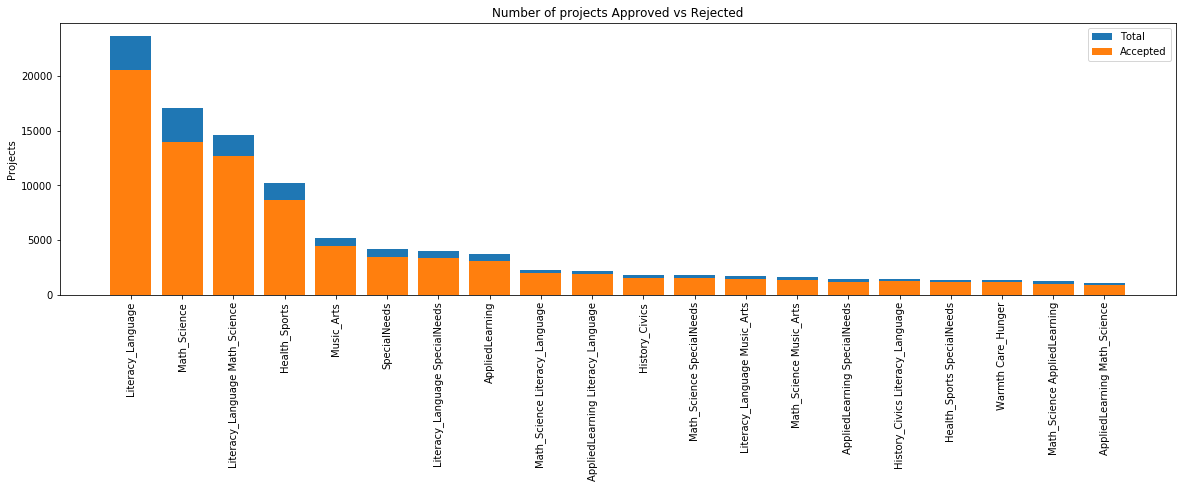

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [15]:
univariate_barplots(project_data,'clean_categories','project_is_approved',top=20)

## Summary
#1: In this analysis, we cleaned the project_subject_categories and drop it form the project_data after adding the cleaned_categories
#2: After the Univariate analysis, we see top 20 categories in the list. Literacy_language ranks first in acceptance rate when compared to AppliedLearnign Math_Science
#3: Top 5 categories are Literacy_Language, Math_Scienc, Literacy_Language Math_Scienc, Health_Sports, Music_Arts

In [16]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())


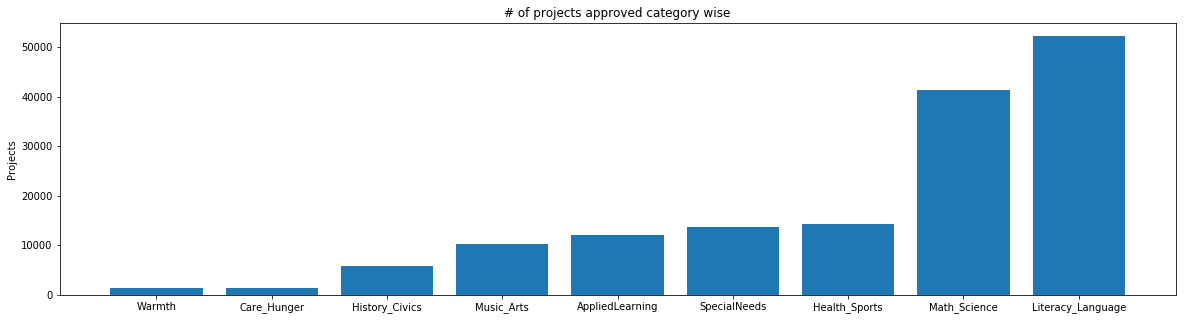

In [17]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(),key=lambda kv:kv[1]))

ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1=plt.bar(ind,list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('# of projects approved category wise')
plt.xticks(ind,list(sorted_cat_dict.keys()))
plt.show()

## Summary
#1: In total we had 9 approved categories
#2: Warmth has least percent of projects got approved; almost negligable when seen with Literacy_Language


In [18]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [19]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [20]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

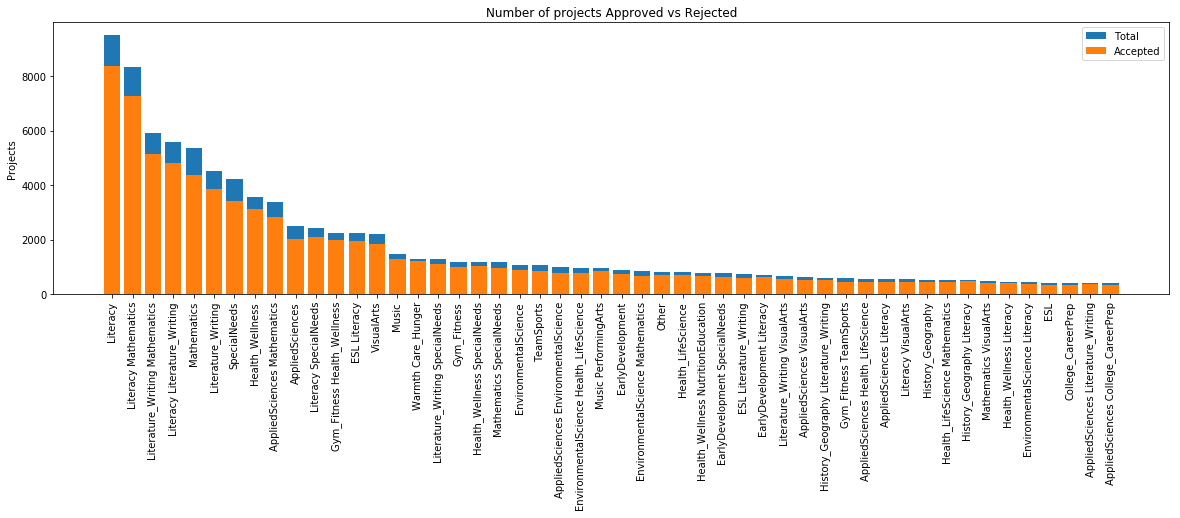

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [21]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

## Summary
#1: From the stats; 8371 were approved for sub category Literacy and the least one is AppliedSciences College_CareerPrep with 330 approvals. 
#2: In the top five expect first and second, the approval rate reduce by average ~1000. 
#2: From the graph; bottom sub categories approval rate is almost lienar 

In [22]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

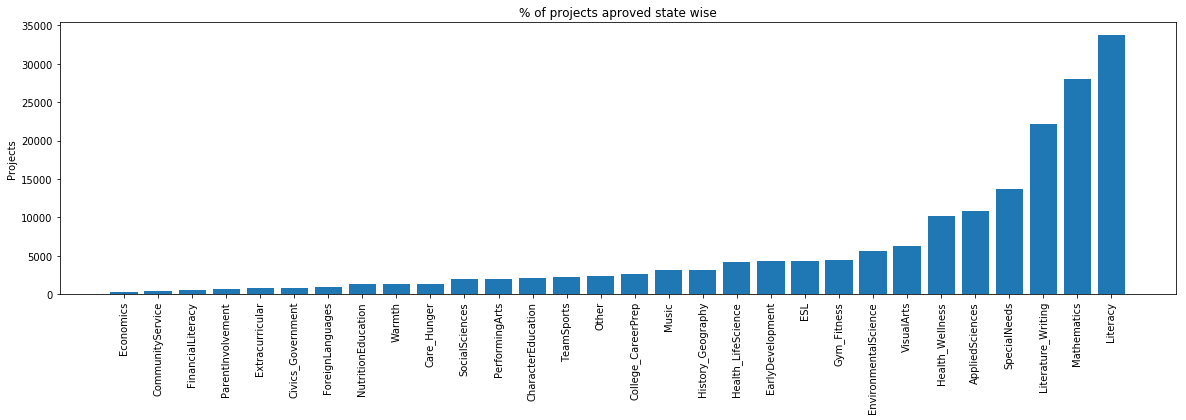

In [23]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()),rotation=90)
plt.show()

## Summary
#1: In total we had 30 approved sub categories
#2: From plot; Literature writing, Mathematics and Literacy has the highest approval rate


In [24]:
#Tabulation results of above graph for better visualiztion
for key, values in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(key,values))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.6 Univariate Analysis: Text featues(Title)

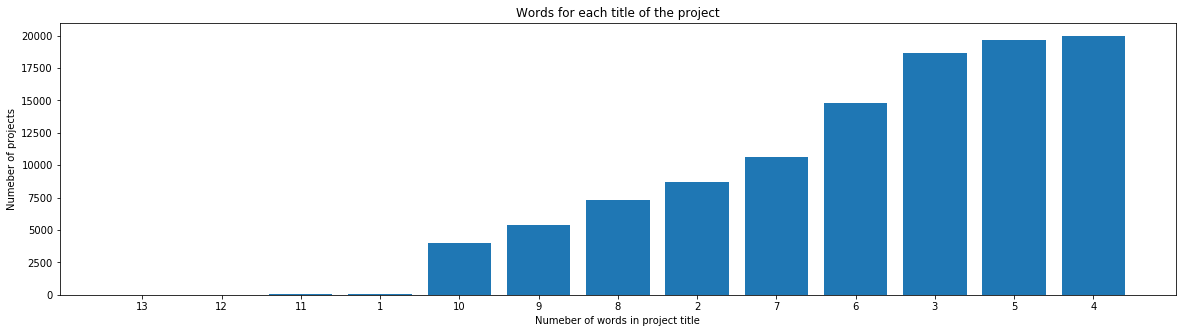

In [25]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber of words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

## Summary
#1: The number of words in the project title range from 1 to 13
#2: Project title having words in range 3 and 6 has highest approval rate
#3: Exceptional case 1 and greater than 13 words in the project title; appoval rate is negligble

In [26]:
#Extracting parameters for box plot; project_is_approved
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

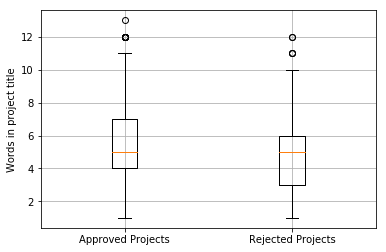

In [27]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

## Summary
#1: The number of words in the project title range from 1 to 13
#2: The mean of approval and rejection rate is ~5 
#3: The minimum of approval and rejection rate is same

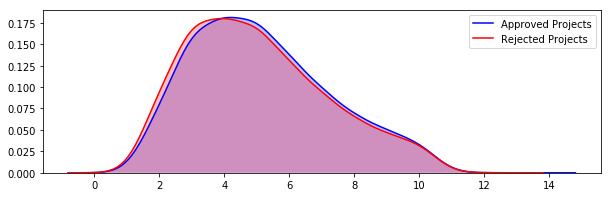

In [28]:
#Probability density using kernal density function with seaborn for projects 
# based on their words in title

plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count, label="Approved Projects", bw=0.6, shade=True, color='b')
sns.kdeplot(rejected_title_word_count, label="Rejected Projects", bw=0.6, shade=True, color='r')
plt.legend()
plt.show()

## Summary
#1: The shaded region for both rates is approximately same

### 1.2.7 Univariate Analysis: Text features(Project Essay's)

In [29]:
# Merging four columns text dataframe:
project_data["Essay"]=project_data["project_essay_1"].map(str)+\
                 project_data["project_essay_2"].map(str)+\
                 project_data["project_essay_3"].map(str)+\
                 project_data["project_essay_4"].map(str)

In [30]:
# Finding the word count for approval and rejection
approved_word_count = project_data[project_data['project_is_approved']==1]['Essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['Essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

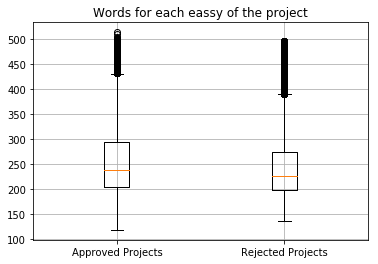

In [31]:
# Box plot for word count; approval and rejection
plt.boxplot([approved_word_count,rejected_word_count])
plt.title('Words for each eassy of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.grid()
plt.show()

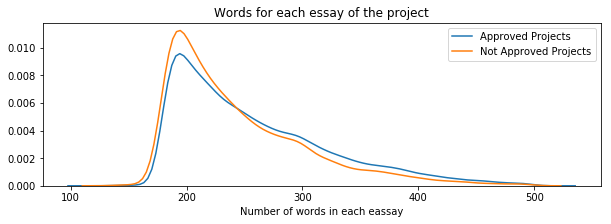

In [32]:
# Dist plot for projects with number of words in the essay
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

## Summary
#1: Approval rate with words in the essay is high at 200 and degrades slowly with the increase of words
#2: Projects with word in essay in range 250 to 450 has higher approval rate than rejection rate

### 1.2.8 Univarite Analysis: Cost per project

In [33]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [34]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [35]:
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [36]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

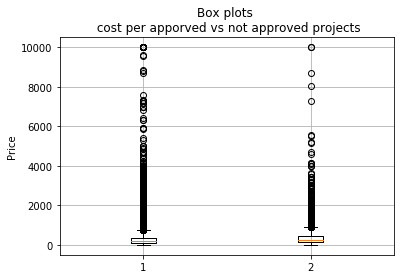

In [37]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price,rejected_price])
plt.title('Box plots \n cost per apporved vs not approved projects')
plt.ylabel('Price')
plt.grid()
plt.show()

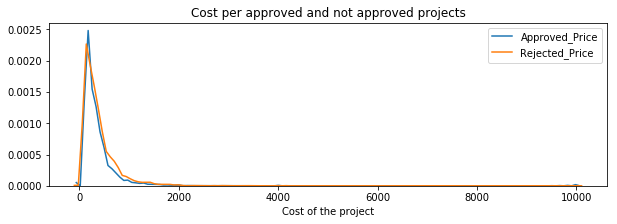

In [38]:
# Dist plot for cost
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label='Approved_Price')
sns.distplot(rejected_price, hist=False, label='Rejected_Price')
plt.title("Cost per approved and not approved projects")
plt.xlabel('Cost of the project')
plt.legend()
plt.show()

## Summary
#1: The price over 1000 has high rate or rejection campared to approval
#2: The price below 500 has higher approval rate 

In [39]:
# http://zetcode.com/python/prettytable/
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x=PrettyTable()
x.field_names=['Percentile','Approved Projects','Not Approved Projects']

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i),3),np.round(np.percentile(rejected_price,i),3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

### 1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects

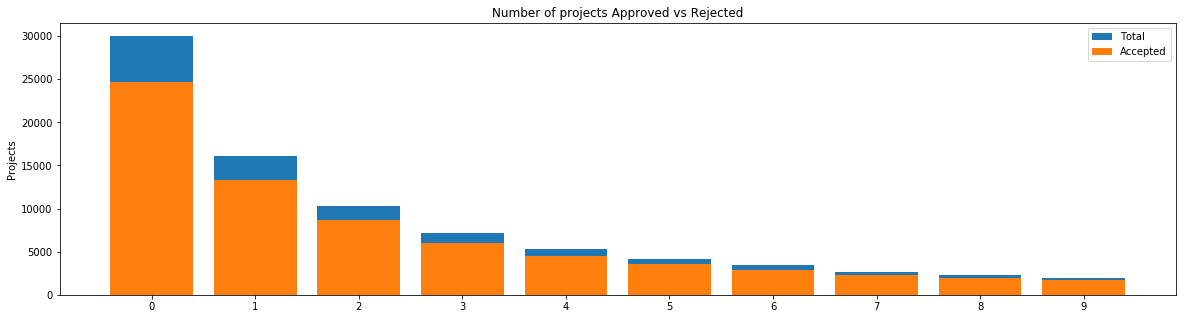

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                24652  30014   
1                                             1                13329  16058   
2                                             2                 8705  10350   
3                                             3                 5997   7110   
4                                             4                 4452   5266   

        Avg  
0  0.821350  
1  0.830054  
2  0.841063  
3  0.843460  
4  0.845423  
   teacher_number_of_previously_posted_projects  project_is_approved  total  \
5                                             5                 3536   4171   
6                                             6                 2911   3404   
7                                             7                 2298   2691   
8                                             8                 1977   2293   
9                                             

In [40]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved' , top=10)

## Summary
#1: Every person who has submitted proposal before, have more than 80 percent approval rate

In [41]:
approved_details = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values
rejected_details = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values

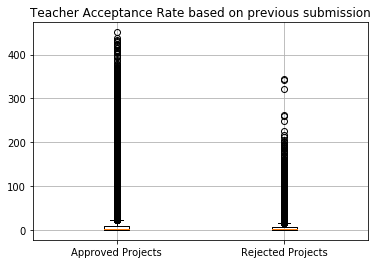

In [42]:
#Box plot for teachers who are submitted before
plt.boxplot([approved_details,rejected_details])
plt.title('Teacher Acceptance Rate based on previous submission')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.grid()
plt.show()

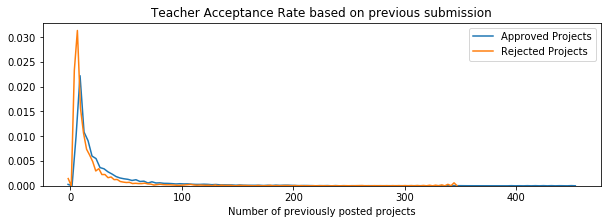

In [43]:
#Dist plot for Teachers who submitted before
plt.figure(figsize=(10,3))
sns.distplot(approved_details,hist=False,label='Approved Projects')
sns.distplot(rejected_details,hist=False,label="Rejected Projects")
plt.title('Teacher Acceptance Rate based on previous submission')
plt.xlabel("Number of previously posted projects")
plt.legend()
plt.show()

## Summary
#1: Teachers who had submitted previously has higher rate of acceptance rate
#2: In contrary, if the proposal is good they still got approved

In [44]:
x=PrettyTable()
x.field_names=["Percentile","Approved Projects","Rejected Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i),3),np.round(np.percentile(rejected_price,i),3)])
print(x)

+------------+-------------------+-------------------+
| Percentile | Approved Projects | Rejected Projects |
+------------+-------------------+-------------------+
|     0      |        0.66       |        1.97       |
|     5      |       13.59       |        41.9       |
|     10     |       33.88       |       73.67       |
|     15     |        58.0       |       99.109      |
|     20     |       77.38       |       118.56      |
|     25     |       99.95       |      140.892      |
|     30     |       116.68      |       162.23      |
|     35     |      137.232      |      184.014      |
|     40     |       157.0       |      208.632      |
|     45     |      178.265      |      235.106      |
|     50     |       198.99      |      263.145      |
|     55     |       223.99      |       292.61      |
|     60     |       255.63      |      325.144      |
|     65     |      285.412      |       362.39      |
|     70     |      321.225      |       399.99      |
|     75  

### 1.2.10 Univariate Analysis: project_resource_summary

In [45]:
resource_summaries=[]

for data in project_data['project_resource_summary']:
    resource_summaries.append(data)

resource_summaries[25:35]

['My students need the learning centers and multiplication kit to help them become masters of 3rd grade math!',
 'My students need 2 ipad minis to enhance learning in all content areas!',
 'My students need Ipads to work in smaller groups to accommodate various learning speeds and abilities',
 'My students need to increase language and literacy skills in a hands-on, engaging way.',
 'My students need basic school supplies such as pencils, pencil top erasers, glue sticks and crayons, scissors, and paper to use in our classroom.',
 "My students need a class set of the book Charlotte's Web so that as a class we can do our first chapter book study.",
 'My students need materials that help make them feel comfortable and accommodate their individual needs.',
 'My students need nonfiction readers and a new carpet to sit on when reading.',
 'My students need a new desktop computer to use in our classroom.',
 'My students need alternative seating, to increase student choice, and add to mobility

In [46]:
numeric_summary_values={}

for currentLine in tqdm(range(len(resource_summaries))):
    for word in resource_summaries[currentLine].split():
        digit=re.search(r'[0-9]+',word)
        if digit:
            numeric_summary_values[currentLine]=int(digit.group())
        

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 47871.34it/s]


In [47]:
numeric_digits={}

for current in tqdm(range(len(resource_summaries))):
    if current in numeric_summary_values.keys():
        numeric_digits[current]=numeric_summary_values[current]
    else:
        numeric_digits[current]=0

100%|█████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 1655243.21it/s]


In [48]:
digits_in_summary=[]

for current in tqdm(numeric_digits.values()):
    if current>0:
        digits_in_summary.append(1)
    else:
        digits_in_summary.append(0)
        

100%|█████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 2434177.57it/s]


In [49]:
project_data['digits_in_summary']=digits_in_summary


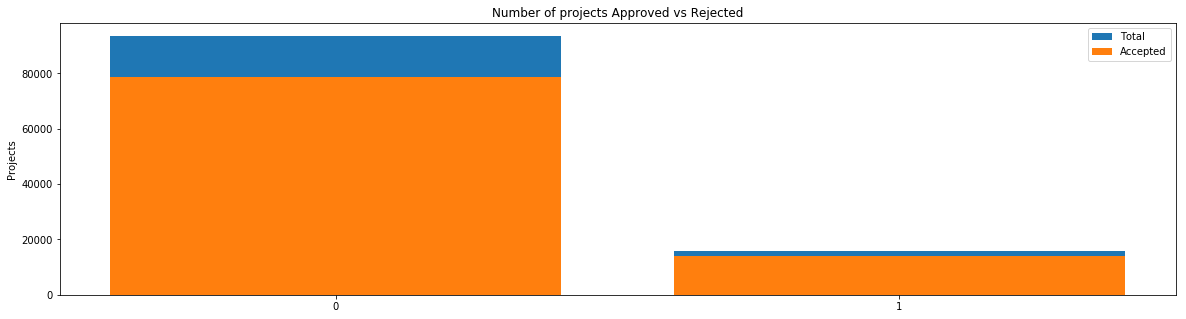

   digits_in_summary  project_is_approved  total       Avg
0                  0                78622  93498  0.840895
1                  1                14084  15750  0.894222
   digits_in_summary  project_is_approved  total       Avg
0                  0                78622  93498  0.840895
1                  1                14084  15750  0.894222


In [50]:
univariate_barplots(project_data,'digits_in_summary','project_is_approved',top=20)

In [51]:
approved_numeric = project_data[project_data['project_is_approved']==1]['digits_in_summary'].values
rejected_numeric = project_data[project_data['project_is_approved']==0]['digits_in_summary'].values

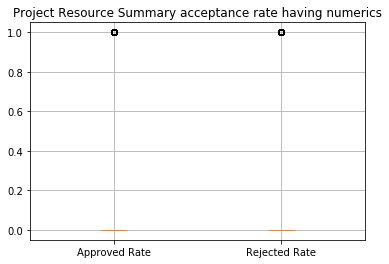

In [52]:
# Box plot for project summary resouce having digits
plt.boxplot([approved_numeric,rejected_numeric])
plt.title('Project Resource Summary acceptance rate having numerics')
plt.xticks([1,2],('Approved Rate','Rejected Rate'))
plt.grid()
plt.show()

## Summary
#1: The project summary had numerics and people who had given numeric requirement for their requirement had ~90 acceptance rate compared to non numeric requirements in their project summary

## Text preprocessing

### Essay Text

In [53]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2        ...          \
0  \"The limits of your language are the limits o...        ...           
1  The projector we need for our school is very c...        ...           

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               Essay  price  quantity  \
0  My students are English learners that are work...  154.6        23   
1  Our students arrive to our school eager to lea...  299.0         1   

   digits_in_summary  
0                  0  
1                  0  

[2 rows x 21 columns]

In [54]:
# printing some random essays.
print(project_data['Essay'].values[0])
print("="*50)
print(project_data['Essay'].values[150])
print("="*50)
print(project_data['Essay'].values[1000])
print("="*50)
print(project_data['Essay'].values[20000])
print("="*50)
print(project_data['Essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [55]:
# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    # \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
    
    phrase = phrase.replace('\\r', ' ')
    phrase = phrase.replace('\\"', ' ')
    phrase = phrase.replace('\\n', ' ')
    
    #remove spacial character: https://stackoverflow.com/a/5843547/4084039
    phrase = re.sub('[^A-Za-z0-9]+', ' ', phrase)
    return phrase

In [56]:
sent = decontracted(project_data['Essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [57]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [58]:
def preprocessing_text(data):
    # Combining all the above statemennts 
    preprocessed_essays = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data.values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed_essays.append(sent.lower().strip())
    return preprocessed_essays

In [59]:
preprocessed_essay=preprocessing_text(project_data['Essay'])

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:04<00:00, 1683.96it/s]


In [60]:
# after preprocesing
preprocessed_essay[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

### 1.3.2 Project title Text

In [61]:
prepossed_ProjectTitle = preprocessing_text(project_data['project_title'])

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 39490.37it/s]


In [62]:
prepossed_ProjectTitle[1000]

'sailing into super 4th grade year'

## 1.4 Preparing data for models

In [63]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'Essay', 'price', 'quantity',
       'digits_in_summary'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [64]:
# we use count vectorizer to convert the values into one hot encoded features
def vec_cat_data_OneHot(data,sorted_cat_dict):
    vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
    vectorizer.fit(project_data[data].values)
    print(vectorizer.get_feature_names())
    
    result = vectorizer.transform(project_data[data].values)
    print("Shape of matrix after one hot encodig ",result.shape)
    return result

In [65]:
categories_one_hot = vec_cat_data_OneHot('clean_categories',sorted_cat_dict)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [66]:
sub_categories_one_hot = vec_cat_data_OneHot('clean_subcategories',sorted_sub_cat_dict)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


### Performing One Hot Encoding for school_state

In [67]:
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

In [68]:
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(),key=lambda kv:kv[1]))

In [69]:
school_state_one_hot = vec_cat_data_OneHot('school_state',sorted_school_state_dict)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (109248, 51)


### Performing One Hot Encoding for project_grade_category

In [70]:
data = project_data['project_grade_category']
project_data.drop(['project_grade_category'],axis=1,inplace=True)

In [71]:
project_grade_category = []
for ele in data:
    project_grade_category.append(ele.replace(" ","_"))
project_grade_category[0:5]

['Grades_PreK-2', 'Grades_6-8', 'Grades_6-8', 'Grades_PreK-2', 'Grades_PreK-2']

In [72]:
project_data['project_grade_category']=project_grade_category
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   
2           AZ        2016-08-31 12:03:56   
3           KY        2016-10-06 21:16:17   
4           TX        2016-07-11 01:10:09   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

            ...                                     project_resource_summary  \
0           ...            My students need opportunities to practice beg...   
1           ...            My students need a projector to help with view...   
2           ...            My students need shine guards, athletic socks,...   
3           ...            My students need to engage in Reading and Math...   
4           ...            My students need hands on practice in mathemat...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            7                    1   
2                                            1                    0   
3                                            4                    1   
4                                            1                    1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

                                               Essay   price  quantity  \
0  My students are English learners that are work...  154.60        23   
1  Our students arrive to our school eager to lea...  299.00         1   
2  \r\n\"True champions aren't always the ones th...  516.85        22   
3  I work at a unique school filled with both ESL...  232.90         4   
4  Our second grade classroom next year will be m...   67.98         4   

   digits_in_summary  project_grade_category  
0                  0           Grades_PreK-2  
1                  0              Grades_6-8  
2                  0              Grades_6-8  
3                  0           Grades_PreK-2  
4                  0           Grades_PreK-2  

[5 rows x 21 columns]

In [73]:
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())

In [74]:
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(),key=lambda kv:kv[1]))


In [75]:
project_grade_category_OneHot = vec_cat_data_OneHot('project_grade_category',sorted_project_grade_category_dict)

['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']
Shape of matrix after one hot encodig  (109248, 4)


### Performing One Hot Encoding for teacher_prefix

In [76]:
data = project_data['teacher_prefix']
project_data.drop(['teacher_prefix'],axis=1,inplace=True)

In [77]:
teacher_prefix = []
for ele in data:
    temp = re.search(r'[a-zA-Z]+',str(ele)).group()
    temp = temp.replace("Teacher","Mrs")
    if pd.isnull(ele):
        temp = temp.replace("nan","Mrs")
    teacher_prefix.append(temp)


In [78]:
project_data['teacher_prefix']=teacher_prefix
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4      ...       teacher_number_of_previously_posted_projects  \
0             NaN      ...                                                  0   
1             NaN      ...                                                  7   

   project_is_approved              clean_categories  \
0                    0             Literacy_Language   
1                    1  History_Civics Health_Sports   

            clean_subcategories  \
0                  ESL Literacy   
1  Civics_Government TeamSports   

                                               Essay  price  quantity  \
0  My students are English learners that are work...  154.6        23   
1  Our students arrive to our school eager to lea...  299.0         1   

   digits_in_summary  project_grade_category teacher_prefix  
0                  0           Grades_PreK-2            Mrs  
1                  0              Grades_6-8             Mr  

[2 rows x 21 columns]

In [79]:
my_counter = Counter()
for word in project_data['teacher_prefix'].values:

    my_counter.update(str(word).split())
my_counter

Counter({'Mrs': 59632, 'Mr': 10648, 'Ms': 38955, 'Dr': 13})

In [80]:
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(),key=lambda kv:kv[1]))

In [81]:
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()),lowercase=False,binary=True)

teacher_prefix_one_hot = vectorizer.fit_transform(project_data['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Ms', 'Mrs']
Shape of matrix after one hot encodig  (109248, 4)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words on preprocessed_essay

In [82]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essay)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.4.2.2 Bag of words on project_title

In [83]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(prepossed_ProjectTitle)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (109248, 3329)


#### 1.4.2.3 TFIDF vectorizer on preprocessed_essay

In [84]:
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essay)
print("Shape of matrix after one hot encoding",text_tfidf.shape)

Shape of matrix after one hot encoding (109248, 16623)


#### 1.4.2.4 TFIDF vectorizer on project title

In [85]:
vectorizer = TfidfVectorizer(min_df=5)
title_tfidf = vectorizer.fit_transform(prepossed_ProjectTitle)
print("Shape of matrix after one hot encoding",title_tfidf.shape)

Shape of matrix after one hot encoding (109248, 5107)


#### 1.4.2.5 Using Pretrained Models: Avg W2V on preprocessed essay

In [86]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [87]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('c:\\glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [88]:
# average Word2Vec
# compute average word2vec for each review.
prepocessed_essay_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    prepocessed_essay_avg_w2v_vectors.append(vector)

print(len(prepocessed_essay_avg_w2v_vectors))
print(len(prepocessed_essay_avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:27<00:00, 3958.63it/s]

109248
300


#### 1.4.2.6 Using Pretained Models: AVG W2V on project_title

In [89]:
# average Word2Vec
# compute average word2vec for each review.
ProjectTitle_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(prepossed_ProjectTitle): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    ProjectTitle_avg_w2v_vectors.append(vector)

print(len(ProjectTitle_avg_w2v_vectors))
print(len(ProjectTitle_avg_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 82692.62it/s]

109248
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V on preprocessed essay

In [90]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essay)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [91]:
# average Word2Vec
# compute average word2vec for each review.
preprocessed_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essay): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    preprocessed_essay_tfidf_w2v_vectors.append(vector)

print(len(preprocessed_essay_tfidf_w2v_vectors))
print(len(preprocessed_essay_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:20<00:00, 545.14it/s]

109248
300


#### 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on project_title

In [92]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(prepossed_ProjectTitle)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [93]:
# average Word2Vec
# compute average word2vec for each review.
prepossed_ProjectTitle_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(prepossed_ProjectTitle): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    prepossed_ProjectTitle_tfidf_w2v_vectors.append(vector)

print(len(prepossed_ProjectTitle_tfidf_w2v_vectors))
print(len(prepossed_ProjectTitle_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 34717.92it/s]

109248
300


### Vectorizing Numerical features

In [94]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [95]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

In [114]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
TeacherPrePosted_standardized = price_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.153165275336848, Standard deviation : 27.77702641477403


In [97]:
TeacherPrePosted_standardized

array([[-0.40152481],
       [-0.14951799],
       [-0.36552384],
       ...,
       [-0.29352189],
       [-0.40152481],
       [-0.40152481]])

In [115]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
Quantity_standardized = price_scalar.transform(project_data['quantity'].values.reshape(-1, 1))

Mean : 16.965610354422964, Standard deviation : 26.182821919093175


In [99]:
Quantity_standardized

array([[ 0.23047132],
       [-0.60977424],
       [ 0.19227834],
       ...,
       [-0.4951953 ],
       [-0.03687954],
       [-0.45700232]])

#### Merging all the above features
   

 - We need to merge all the numerical vectors i.e categorical, text, numerical vectors

In [100]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)
print(title_bow.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)
(109248, 3329)


In [101]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized,TeacherPrePosted_standardized,
           Quantity_standardized))
X.shape

(109248, 16665)

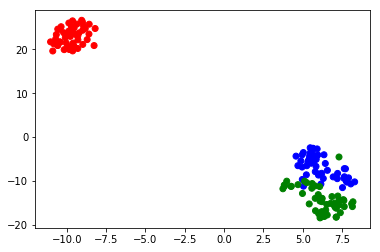

In [102]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris['data']
y = iris['target']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [103]:
TotalData = hstack((categories_one_hot,sub_categories_one_hot,school_state_one_hot,
                                 project_grade_category_OneHot,teacher_prefix_one_hot,price_standardized,TeacherPrePosted_standardized,
                                 Quantity_standardized,title_bow))
TotalData.shape

(109248, 3430)

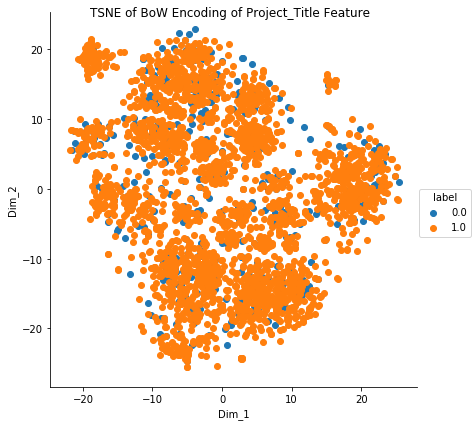

In [104]:
TotalData_BOW=TotalData.tocsr()
Total_BOW_3000 = TotalData_BOW[:3000,:].toarray()
#Total_3000.shape

labels = project_data['project_is_approved'] #The feature we need to plot
labels_3000 = labels[0:3000]

model = TSNE(n_components=2, random_state=0 ,perplexity=100,learning_rate=200)
tsne_data = model.fit_transform(Total_BOW_3000)
#Vertical stacking labels to the tsne_data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
# Create a new data frame for ploting the result
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
# Ploting the result of tsne usinf Seaborn
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend().fig.suptitle("TSNE of BoW Encoding of Project_Title Feature ")
plt.show()



#### Summary:
   - The scatter plot of TSNE with BOW encoding on project title is vain as there are no clusters of blue or orange in any way
   - The data points are all over the place overlapped, merged and irregular pattern
   - Hard to draw a line to predict difference between 0 and 1 

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

In [105]:
TotalData = hstack((categories_one_hot,sub_categories_one_hot,school_state_one_hot,
                                 project_grade_category_OneHot,teacher_prefix_one_hot,price_standardized,TeacherPrePosted_standardized,
                                 Quantity_standardized,title_tfidf))
TotalData.shape

(109248, 5208)

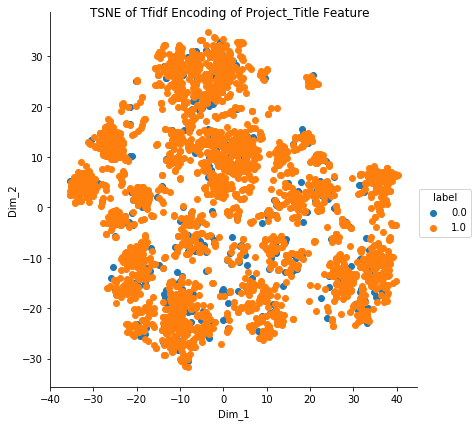

In [106]:
TotalData_tfidf=TotalData.tocsr()
Total_tfidf_3000 = TotalData_tfidf[:3000,:].toarray()

labels = project_data['project_is_approved'] #The feature we need to plot
labels_3000 = labels[0:3000]

model = TSNE(n_components=2, random_state=0 ,perplexity=100,learning_rate=200)
tsne_data = model.fit_transform(Total_tfidf_3000)
#Vertical stacking labels to the tsne_data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
# Create a new data frame for ploting the result
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
# Ploting the result of tsne usinf Seaborn
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend().fig.suptitle("TSNE of Tfidf Encoding of Project_Title Feature ")
plt.show()


#### Summary:
   - The scatter plot of TSNE with tfidf encoding on project title is not much of use, this analysis does not provide clear picture; no clustering between blue and orange
   - The data points are all over the place hard to find a regular pattern
   - Hard to draw a line to predict difference between 0 and 1 

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

In [107]:
TotalData = hstack((categories_one_hot,sub_categories_one_hot,school_state_one_hot,
                                 project_grade_category_OneHot,teacher_prefix_one_hot,price_standardized,TeacherPrePosted_standardized,
                                 Quantity_standardized,ProjectTitle_avg_w2v_vectors))
TotalData.shape

(109248, 401)

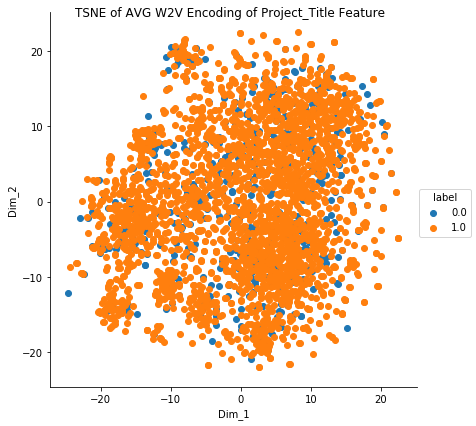

In [108]:
TotalData_avg_w2v=TotalData.tocsr()
TotalData_avg_w2v_3000 = TotalData_avg_w2v[:3000,:].toarray()

labels = project_data['project_is_approved'] #The feature we need to plot
labels_3000 = labels[0:3000]

model = TSNE(n_components=2, random_state=0 ,perplexity=100,learning_rate=200)
tsne_data = model.fit_transform(TotalData_avg_w2v_3000)
#Vertical stacking labels to the tsne_data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
# Create a new data frame for ploting the result
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
# Ploting the result of tsne usinf Seaborn
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend().fig.suptitle("TSNE of AVG W2V Encoding of Project_Title Feature ")
plt.show()

#### Summary:
   - The scatter plot of TSNE with AVG W2V encoding is same as above plots, this analysis does not provide clear picture; no clustering between blue and orange
   - The data points are all over the place hard to find a regular pattern
   - Hard to draw a line to predict difference between 0 and 1 

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [109]:
TotalData = hstack((categories_one_hot,sub_categories_one_hot,school_state_one_hot,
                                 project_grade_category_OneHot,teacher_prefix_one_hot,price_standardized,TeacherPrePosted_standardized,
                                 Quantity_standardized,prepossed_ProjectTitle_tfidf_w2v_vectors))
TotalData.shape

(109248, 401)

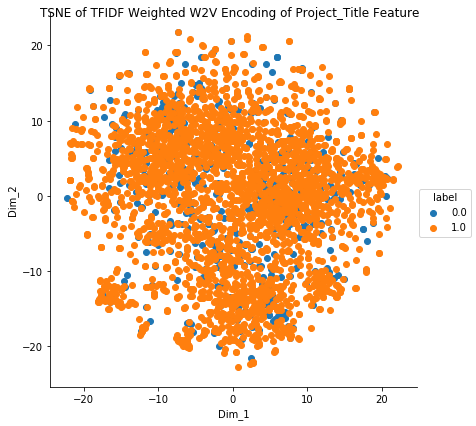

In [110]:
TotalData_tfidf_weighted_w2v=TotalData.tocsr()
TotalData_tfidf_weighted_w2v_3000 = TotalData_tfidf_weighted_w2v[:3000,:].toarray()

labels = project_data['project_is_approved'] #The feature we need to plot
labels_3000 = labels[0:3000]

model = TSNE(n_components=2, random_state=0 ,perplexity=100,learning_rate=200)
tsne_data = model.fit_transform(TotalData_tfidf_weighted_w2v_3000)
#Vertical stacking labels to the tsne_data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
# Create a new data frame for ploting the result
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
# Ploting the result of tsne usinf Seaborn
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend().fig.suptitle("TSNE of TFIDF Weighted W2V Encoding of Project_Title Feature ")
plt.show()

#### Summary:
   - The scatter plot of TSNE with tfidf encoding on project title is same as others, this analysis does not provide clear picture; no clustering between blue and orange
   - The data points are all over the place hard to find a regular pattern
   - Hard to draw a line to predict difference between 0 and 1 

<h2> 2.5 TSNE with `BOW`,`TFIDF`,`AVG W2V`,`TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [111]:
TotalData = hstack((categories_one_hot,sub_categories_one_hot,school_state_one_hot,
                    project_grade_category_OneHot,teacher_prefix_one_hot,price_standardized,
                    TeacherPrePosted_standardized,Quantity_standardized,prepossed_ProjectTitle_tfidf_w2v_vectors,
                    title_bow,title_tfidf,ProjectTitle_avg_w2v_vectors))
TotalData.shape

(109248, 9137)

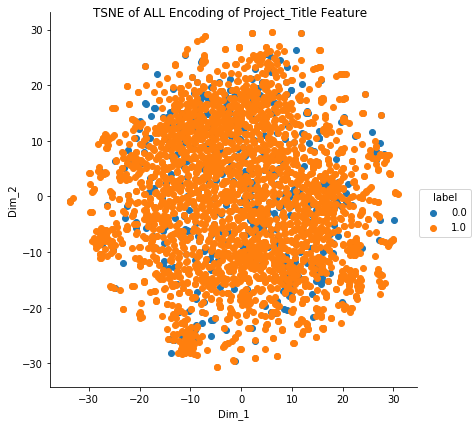

In [112]:
TotalData_All=TotalData.tocsr()
TotalData_All_3000 = TotalData_All[:3000,:].toarray()

labels = project_data['project_is_approved'] #The feature we need to plot
labels_3000 = labels[0:3000]

model = TSNE(n_components=2, random_state=0 ,perplexity=100,learning_rate=200)
tsne_data = model.fit_transform(TotalData_All_3000)
#Vertical stacking labels to the tsne_data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
# Create a new data frame for ploting the result
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
# Ploting the result of tsne usinf Seaborn
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend().fig.suptitle("TSNE of ALL Encoding of Project_Title Feature ")
plt.show()

#### Summary:
   - Even, The scatter plot of TSNE with all encoding together on project title is not entertaining, this analysis does not provide clear picture; no clustering between blue and orange. Prefer to find other analysis to find the prediction
   - The data points are all over the place hard to find a regular pattern
   - Hard to draw a line to predict difference between 0 and 1 

<h2> 2.5 Summary </h2>

- From the visualization of four different plots of TSNE and combined plot of all of them did not provide any expected results. 
Better to try other models to predict the difference between Acceptance and Rejection

### CONCLUSION
- Delaware (DE) state from the United States had the highest percent of projects accepted within the whole country having almost 90% acceptance rate, followed by North Dakota (ND) and Washington (WA) nearly 89% and 88% respectively
- Vermont (VT) had the lowest Approval rate with exactly 80% similar trend was seen for District of Columbia (DC) and Texas (TX) with approximately 80% and 81% respectively
- Female Teachers had the maximum number of projects proposed and got accepted compared to Male Teachers
- There are alot of projects proposed for the children between Pre Kindergarden and 2nd Grade. In contrary, it kept decreasing as the go higher the Grades and their acceptance rate was also less
- Projects belonging to the Literacy and Language categories got the highest number of proposals; We noticed that the maximum number of projects belong to this category got accepted and stagnated at 87%.Similarly, Maths and Science seized at 82%
- There is also Variability in Acceptance rate, projects under the category Warmth, Care and Hunger have an accpetance rate of 93.5%
- The highest number of projects are registered under Literacy and Langauage with 52,239 projects, followed by Maths and Science having 41,421 projects
- The sub-Category Literacy had the highest number of projects approved with 8371 projects and its accpetance rate was 88%
- The sub-Category Health and Wellness had the lowest number of projects proposed with 3,583 projects that was half of sub-Category Literacy
- Projects having 3 to 5 words in the title had highest acceptance rate in comparsion with project titles containing more than 10 words
- The number of words in the Project Essays of Approved Projects were slightly more than the number of words in the Project Essays of the Rejected Projects
- The Maximum price for any project should be less than 10,000 dollars.The approved projects tend to have lower cost when compared to the projects that have not been approved

- We observe, Teachers who had a previous proposal, acceptance rate for them was high, with current proposals. It is not a pattern, New talent and efforts are well appreciated.
- The project summaries containing numeric values had a very high acceptance rate at 90%. The proper numbered requirements provides clarity in the proposals and requirements making it a successful proposal
- We observed that on an average each project costs nearly 298 Dollars. The Price paid was generally for the purchase of the items. 
